In [1]:
from flask import Flask, render_template, redirect, request, url_for, session
from flask_mysqldb import MySQL, MySQLdb
import bcrypt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import random
from flask import Response
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('laporan_barang.csv')

In [3]:
df.head(10)

,NAMA_PERALATAN,MEREK,BUATAN,KATEGORI,TAHUN_BUATAN,KONDISI,SERTIFIKASI,KETERANGAN
0,X-Ray,Rapiscan,Malaysia,3,2012,53,2,Rusak
1,X-Ray,Smith,Malaysia,2,2018,93,2,Normal
2,X-Ray,Smith,Malaysia,2,2015,73,2,Perbaikan
3,X-Ray,Rapiscan,Malaysia,4,2017,87,2,Normal
4,X-Ray,Rapiscan,Malaysia,4,2018,93,2,Normal
5,X-Ray,Rapiscan,Malaysia,2,2017,87,2,Normal
6,X-Ray,Rapiscan,Malaysia,1,2019,100,1,Normal
7,X-Ray,Smith,Malaysia,2,2016,80,2,Perbaikan
8,X-Ray,Smith,Malaysia,1,2016,80,2,Perbaikan
9,X-Ray,Smith,Malaysia,3,2011,47,2,Rusak


In [4]:
df.columns

Index(['NAMA_PERALATAN', 'MEREK', 'BUATAN', 'KATEGORI', 'TAHUN_BUATAN',
       'KONDISI', 'SERTIFIKASI', 'KETERANGAN'],
      dtype='object')

In [5]:
df.shape

(380, 8)

In [6]:
df.describe()

,KATEGORI,TAHUN_BUATAN,KONDISI,SERTIFIKASI
count,380.000000,380.000000,380.000000,380.000000
mean,3.010526,2016.500000,81.884211,1.994737
std,1.108801,1.747218,25.731971,0.072452
min,1.000000,1999.000000,0.000000,1.000000
25%,2.000000,2016.000000,70.000000,2.000000
50%,3.000000,2016.000000,100.000000,2.000000
75%,4.000000,2017.000000,100.000000,2.000000
max,4.000000,2020.000000,100.000000,2.000000


In [7]:
df.loc[:, ['NAMA_PERALATAN','MEREK','BUATAN','KATEGORI','TAHUN_BUATAN','KONDISI','SERTIFIKASI','KETERANGAN']]

,NAMA_PERALATAN,MEREK,BUATAN,KATEGORI,TAHUN_BUATAN,KONDISI,SERTIFIKASI,KETERANGAN
0,X-Ray,Rapiscan,Malaysia,3,2012,53,2,Rusak
1,X-Ray,Smith,Malaysia,2,2018,93,2,Normal
2,X-Ray,Smith,Malaysia,2,2015,73,2,Perbaikan
3,X-Ray,Rapiscan,Malaysia,4,2017,87,2,Normal
4,X-Ray,Rapiscan,Malaysia,4,2018,93,2,Normal
...,...,...,...,...,...,...,...,...
375,Fire Alarm System,Notifier,USA,4,2016,100,2,Normal
376,Fire Alarm System,Notifier,USA,4,2016,100,2,Normal
377,Fire Alarm System,Notifier,USA,4,2016,100,2,Normal
378,Fire Alarm System,Notifier,USA,4,2016,100,2,Normal


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NAMA_PERALATAN  380 non-null    object
 1   MEREK           379 non-null    object
 2   BUATAN          379 non-null    object
 3   KATEGORI        380 non-null    int64 
 4   TAHUN_BUATAN    380 non-null    int64 
 5   KONDISI         380 non-null    int64 
 6   SERTIFIKASI     380 non-null    int64 
 7   KETERANGAN      380 non-null    object
dtypes: int64(4), object(4)
memory usage: 23.9+ KB


In [9]:
df_features = df.drop('KETERANGAN', axis=1)
df_target = df['KETERANGAN']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   NAMA_PERALATAN  380 non-null    object
 1   MEREK           379 non-null    object
 2   BUATAN          379 non-null    object
 3   KATEGORI        380 non-null    int64 
 4   TAHUN_BUATAN    380 non-null    int64 
 5   KONDISI         380 non-null    int64 
 6   SERTIFIKASI     380 non-null    int64 
 7   KETERANGAN      380 non-null    object
dtypes: int64(4), object(4)
memory usage: 23.9+ KB


In [11]:
df_features

,NAMA_PERALATAN,MEREK,BUATAN,KATEGORI,TAHUN_BUATAN,KONDISI,SERTIFIKASI
0,X-Ray,Rapiscan,Malaysia,3,2012,53,2
1,X-Ray,Smith,Malaysia,2,2018,93,2
2,X-Ray,Smith,Malaysia,2,2015,73,2
3,X-Ray,Rapiscan,Malaysia,4,2017,87,2
4,X-Ray,Rapiscan,Malaysia,4,2018,93,2
...,...,...,...,...,...,...,...
375,Fire Alarm System,Notifier,USA,4,2016,100,2
376,Fire Alarm System,Notifier,USA,4,2016,100,2
377,Fire Alarm System,Notifier,USA,4,2016,100,2
378,Fire Alarm System,Notifier,USA,4,2016,100,2


In [12]:
cols = ['NAMA_PERALATAN',  'MEREK', 'BUATAN', 'TAHUN_BUATAN','KATEGORI', 'KONDISI','SERTIFIKASI']

df_features[cols] = df_features[cols].astype('category')

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   NAMA_PERALATAN  380 non-null    category
 1   MEREK           379 non-null    category
 2   BUATAN          379 non-null    category
 3   KATEGORI        380 non-null    category
 4   TAHUN_BUATAN    380 non-null    category
 5   KONDISI         380 non-null    category
 6   SERTIFIKASI     380 non-null    category
dtypes: category(7)
memory usage: 5.9 KB


In [13]:
for col in cols:
        df_features[col] = df_features[col].cat.codes
        
df_features.head()

,NAMA_PERALATAN,MEREK,BUATAN,KATEGORI,TAHUN_BUATAN,KONDISI,SERTIFIKASI
0,13,16,7,2,2,4,1
1,13,18,7,1,8,14,1
2,13,18,7,1,5,8,1
3,13,16,7,3,7,12,1
4,13,16,7,3,8,14,1


In [14]:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler().fit_transform(df_features)

cols = list(df_features.columns)

df_features_scale = pd.DataFrame(scale, columns=cols)
df_features_scale.head()

,NAMA_PERALATAN,MEREK,BUATAN,KATEGORI,TAHUN_BUATAN,KONDISI,SERTIFIKASI
0,2.121114,0.300888,-0.21046,-0.009506,-2.954886,-1.360418,0.072739
1,2.121114,0.615001,-0.21046,-0.912570,0.959780,0.427130,0.072739
2,2.121114,0.615001,-0.21046,-0.912570,-0.997553,-0.645399,0.072739
3,2.121114,0.300888,-0.21046,0.893558,0.307336,0.069620,0.072739
4,2.121114,0.300888,-0.21046,0.893558,0.959780,0.427130,0.072739


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_features_scale, df_target, test_size=0.2, random_state=42)

print('Train set :', X_train.shape, y_train.shape)
print('Test set :', X_test.shape, y_test.shape)

Train set : (304, 7) (304,)
Test set : (76, 7) (76,)


In [16]:
#Membuat model naive bayes terhadap training test
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [17]:
#prediksi hasil test set
y_pred = classifier.predict(X_test)
y_pred

array(['Normal', 'Normal', 'Normal', 'Perbaikan', 'Perbaikan', 'Normal',
       'Rusak', 'Normal', 'Normal', 'Rusak', 'Perbaikan', 'Normal',
       'Perbaikan', 'Normal', 'Normal', 'Normal', 'Perbaikan', 'Normal',
       'Perbaikan', 'Normal', 'Rusak', 'Perbaikan', 'Normal', 'Rusak',
       'Rusak', 'Normal', 'Rusak', 'Rusak', 'Rusak', 'Normal', 'Normal',
       'Normal', 'Rusak', 'Perbaikan', 'Normal', 'Perbaikan', 'Rusak',
       'Rusak', 'Rusak', 'Normal', 'Normal', 'Normal', 'Perbaikan',
       'Perbaikan', 'Perbaikan', 'Normal', 'Normal', 'Perbaikan',
       'Perbaikan', 'Normal', 'Rusak', 'Normal', 'Normal', 'Normal',
       'Normal', 'Perbaikan', 'Rusak', 'Normal', 'Normal', 'Normal',
       'Perbaikan', 'Normal', 'Perbaikan', 'Rusak', 'Normal', 'Rusak',
       'Perbaikan', 'Perbaikan', 'Perbaikan', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Rusak', 'Normal'], dtype='<U9')

In [18]:
print(y_pred[0:5])
print(y_test[0:5])

['Normal' 'Normal' 'Normal' 'Perbaikan' 'Perbaikan']
266       Normal
261       Normal
265       Normal
39        Normal
33     Perbaikan
Name: KETERANGAN, dtype: object


In [19]:
#menghitung akurasi
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.868421052631579

In [20]:

#confusion matriks
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

      Normal       1.00      0.80      0.89        49
   Perbaikan       0.50      1.00      0.67        10
       Rusak       1.00      1.00      1.00        17

    accuracy                           0.87        76
   macro avg       0.83      0.93      0.85        76
weighted avg       0.93      0.87      0.88        76



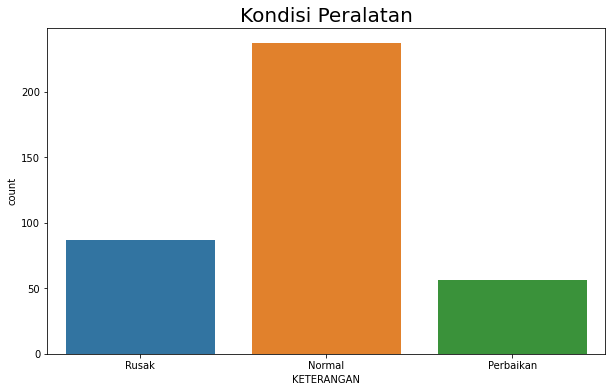

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="KETERANGAN")
plt.title("Kondisi Peralatan", fontsize=20)
plt.show()

<AxesSubplot:>

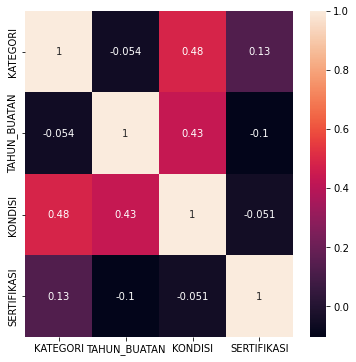

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot= True )